In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model

# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 

# initial plotting and plot styling libraries (will be overriden)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

 

In [265]:
#Read in data
pd.options.display.max_columns = 150 #unnecessary in this particular example


ts=pd.read_csv('/Users/annapeebles-brown/Downloads/tseriesq.csv', index_col=0, parse_dates=True)


ts = ts.reset_index() 
ts['trend']= 1+ ts.index


#create trend

#trend = pd.Series(0, dtype='int64')

#for i, row in ts.iterrows() :
    #trend = 1 + i
    


#for i, row in enumerate(ts):
    #ts['trend']+1

#shows length
print(len(ts))

#Shows info on data
ts.info()
ts

247
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 9 columns):
obs        247 non-null datetime64[ns]
gdp        247 non-null int64
unr        183 non-null float64
cpi        111 non-null float64
tbr        167 non-null float64
tbr_eq     167 non-null float64
year       247 non-null int64
quarter    247 non-null int64
trend      247 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 17.4 KB


,obs,gdp,unr,cpi,tbr,tbr_eq,year,quarter,trend
0,1955-01-01,107263,NaN,NaN,NaN,NaN,1955,1,1
1,1955-04-01,107398,NaN,NaN,NaN,NaN,1955,2,2
2,1955-07-01,109591,NaN,NaN,NaN,NaN,1955,3,3
3,1955-10-01,109050,NaN,NaN,NaN,NaN,1955,4,4
4,1956-01-01,110201,NaN,NaN,NaN,NaN,1956,1,5
5,1956-04-01,109919,NaN,NaN,NaN,NaN,1956,2,6
6,1956-07-01,109859,NaN,NaN,NaN,NaN,1956,3,7
7,1956-10-01,110336,NaN,NaN,NaN,NaN,1956,4,8
8,1957-01-01,112513,NaN,NaN,NaN,NaN,1957,1,9
9,1957-04-01,112481,NaN,NaN,NaN,NaN,1957,2,10


In [267]:
#show int64 data - overview
ts.select_dtypes('int').head()


,gdp,year,quarter,trend
0,107263,1955,1,1
1,107398,1955,2,2
2,109591,1955,3,3
3,109050,1955,4,4
4,110201,1956,1,5


In [268]:
#Convert to float - want to perform log transformation and first difference:
ts['gdp'] = ts['gdp'].astype(np.float64)
y = ts['gdp']

#Perform log transformation (monotonic transformation)
ts['lgdp'] = ts['gdp'].apply(np.log)
y_log = ts['lgdp']

#First difference/lag log GDP
ts['dlgdp'] = ts['lgdp'].shift(1)
#y_diff = np.diff(y)
ts



,obs,gdp,unr,cpi,tbr,tbr_eq,year,quarter,trend,lgdp,dlgdp
0,1955-01-01,107263.0,NaN,NaN,NaN,NaN,1955,1,1,11.583039,NaN
1,1955-04-01,107398.0,NaN,NaN,NaN,NaN,1955,2,2,11.584297,11.583039
2,1955-07-01,109591.0,NaN,NaN,NaN,NaN,1955,3,3,11.604511,11.584297
3,1955-10-01,109050.0,NaN,NaN,NaN,NaN,1955,4,4,11.599562,11.604511
4,1956-01-01,110201.0,NaN,NaN,NaN,NaN,1956,1,5,11.610061,11.599562
5,1956-04-01,109919.0,NaN,NaN,NaN,NaN,1956,2,6,11.607499,11.610061
6,1956-07-01,109859.0,NaN,NaN,NaN,NaN,1956,3,7,11.606953,11.607499
7,1956-10-01,110336.0,NaN,NaN,NaN,NaN,1956,4,8,11.611286,11.606953
8,1957-01-01,112513.0,NaN,NaN,NaN,NaN,1957,1,9,11.630824,11.611286
9,1957-04-01,112481.0,NaN,NaN,NaN,NaN,1957,2,10,11.630540,11.630824


In [269]:
fit = smf.ols(formula="lgdp ~ obs", data=ts).fit()
print(fit.summary())
predict = fit.predict(ts)
ts['fitted'] = predict


ts['res'] = ts['lgdp'] - ts['fitted']

                            OLS Regression Results                            
Dep. Variable:                   lgdp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 25 Sep 2018   Prob (F-statistic):                nan
Time:                        16:21:45   Log-Likelihood:                 7214.2
No. Observations:                 247   AIC:                        -1.393e+04
Df Residuals:                       0   BIC:                        -1.307e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


,obs,gdp,unr,cpi,tbr,tbr_eq,year,quarter,trend,lgdp,dlgdp
0,1955-01-01,107263.0,NaN,NaN,NaN,NaN,1955,1,1,11.583039,NaN
1,1955-04-01,107398.0,NaN,NaN,NaN,NaN,1955,2,2,11.584297,11.583039
2,1955-07-01,109591.0,NaN,NaN,NaN,NaN,1955,3,3,11.604511,11.584297
3,1955-10-01,109050.0,NaN,NaN,NaN,NaN,1955,4,4,11.599562,11.604511
4,1956-01-01,110201.0,NaN,NaN,NaN,NaN,1956,1,5,11.610061,11.599562
5,1956-04-01,109919.0,NaN,NaN,NaN,NaN,1956,2,6,11.607499,11.610061
6,1956-07-01,109859.0,NaN,NaN,NaN,NaN,1956,3,7,11.606953,11.607499
7,1956-10-01,110336.0,NaN,NaN,NaN,NaN,1956,4,8,11.611286,11.606953
8,1957-01-01,112513.0,NaN,NaN,NaN,NaN,1957,1,9,11.630824,11.611286
9,1957-04-01,112481.0,NaN,NaN,NaN,NaN,1957,2,10,11.630540,11.630824


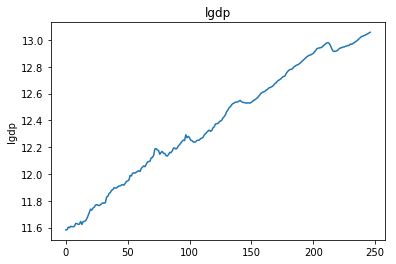

In [258]:
#looking for possible structural breaks, whether the data
# has a relatively constant mean, variance and autocovariance : weak stationary 

#plot log GDP
plt.plot(ts.index, y_log)
plt.title('lgdp')
plt.ylabel('lgdp');
plt.show()



#plot 

In [266]:
fit = smf.ols(formula="lgdp ~ obs", data=ts).fit()
print(fit.summary())
predict = fit.predict(ts)
ts['fitted'] = predict


ts['res'] = ts['lgdp'] - ts['fitted']



PatsyError: Error evaluating factor: NameError: name 'lgdp' is not defined
    lgdp ~ obs
    ^^^^

In [122]:
rolling = y_log.rolling(4).mean()
rolling = y_log.rolling(4).std()



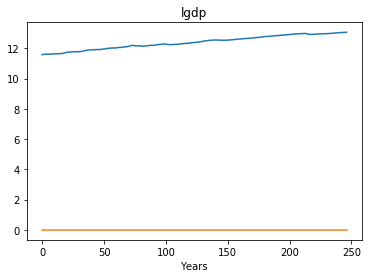

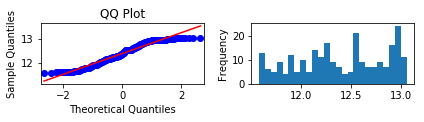

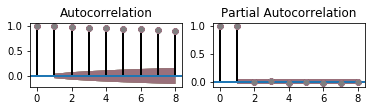

In [271]:

#fig = plt.figure(figsize=(14, 8))
#layout = (3, 2)




# time series plot

#ax_ts = ts['lgdp'].plot(x_compat=True, style='--', color=["r","b"])
#rolling.plot(color='crimson', ax=ax_ts, legend=0) 
#rolling.plot(style='darkslateblue')
plt.plot(ts.index, y_log, ts['res'])
plt.title('lgdp')
plt.xlabel('Years');
plt.show()
#ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
#y_log.plot(ax=ts_ax)
#rolling_mean.plot(ax=ts_ax, color='crimson');
#rolling_std.plot(ax=ts_ax, color='darkslateblue');

#qq plot
qq_ax = plt.subplot2grid(layout, (2, 0))
sm.qqplot(y_log, line='s', ax=qq_ax)
qq_ax.set_title('QQ Plot')

# hist plot
hist_ax = plt.subplot2grid(layout, (2, 1))
y_log.plot(ax=hist_ax, kind='hist', bins=25);
plt.tight_layout();
plt.show()

# acf and pacf
#acf_ax = plt.subplot2grid(layout, (1, 0))
#pacf_ax = plt.subplot2grid(layout, (1, 1))
smt.graphics.plot_acf(y_log, lags=8, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(y_log, lags=8, ax=pacf_ax, alpha=0.5) 




In [273]:
def adf_test(y_log):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y_log, autolag=8)
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [274]:
adf_test(y_log)

Results of Augmented Dickey-Fuller test:


AttributeError: 'int' object has no attribute 'lower'